# Wrestling Participation Over the Years from NFSH High School Participation Survey

## Please note that there is no available data for 2019/2020 and 2020/2021 due to COVID-19 school closures

##### Import Libraries and Define Environment Settings

In [1130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

In [1131]:
# Environment settings: 
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

### Import Datasets
#### Import 2002/2003 through 2018/2019 datasets
- From National Federation of State High School Associations (NFHS) High School Participation Survey
- The School columns gives the number of schools that have that particular sport for boys or girls
- The participation column gives the number of participants in that particular sport for boys or girls

In [1132]:
df = pd.read_csv('Wrestling.csv')

### Cleaning the Data

In [1133]:
# Create a function to dummy code 'Sport' column to wrestling or not wrestling
def wrestling_dummy(sport):
    if df['Sport']=='Wrestling':
        return 1
    else:
        return 0

In [1134]:
# Create a column 'IsWrestling' that is given a value of 1 if that row's 'Sport' column contains the string 'Wrestling'
df['IsWrestling']=df['Sport'].apply(lambda x: 1 if x == 'Wrestling'
                                   else 0)

In [1135]:
# Create a dataframe 'Wrestling'
Wrestling = df[df['IsWrestling']==1]

In [1136]:
## add the 2021/2022 wrestling statistics to the wrestling df
wrestling2122=pd.read_csv('21_22.csv')

In [1137]:
# remove the NaN columns and rows
wrestling2122 = wrestling2122.dropna(axis=1, thresh=2)
# Drop columns with any NaN values
wrestling2122 = wrestling2122.dropna(axis=0, how='any')

In [1138]:
# concatenate the 21/22 wrestling df with the original wrestling df
wrestling = pd.concat([Wrestling, wrestling2122]).reset_index(drop=True)

In [1139]:
# assign NaN values in 'IsWrestling' column to 1
wrestling['IsWrestling'].fillna(1, inplace=True)

In [1140]:
wrestling['Boys Participation'] = wrestling['Boys Participation'].astype('float')

In [1141]:
OtherSports = df[df['IsWrestling']==0]

In [1142]:
other_sports_grouped_year = OtherSports.groupby(['Year']).sum(numeric_only=True)

In [1143]:
wrestling_grouped_year = wrestling.groupby('Year').sum(numeric_only=True)

df_grouped_year = df.groupby(['Year','Sport']).sum(numeric_only=True)

# Exploring and Visualizing the Data

## Visualizing the Changes in Wrestling Participation Over the Years

(200000.0, 300000.0)

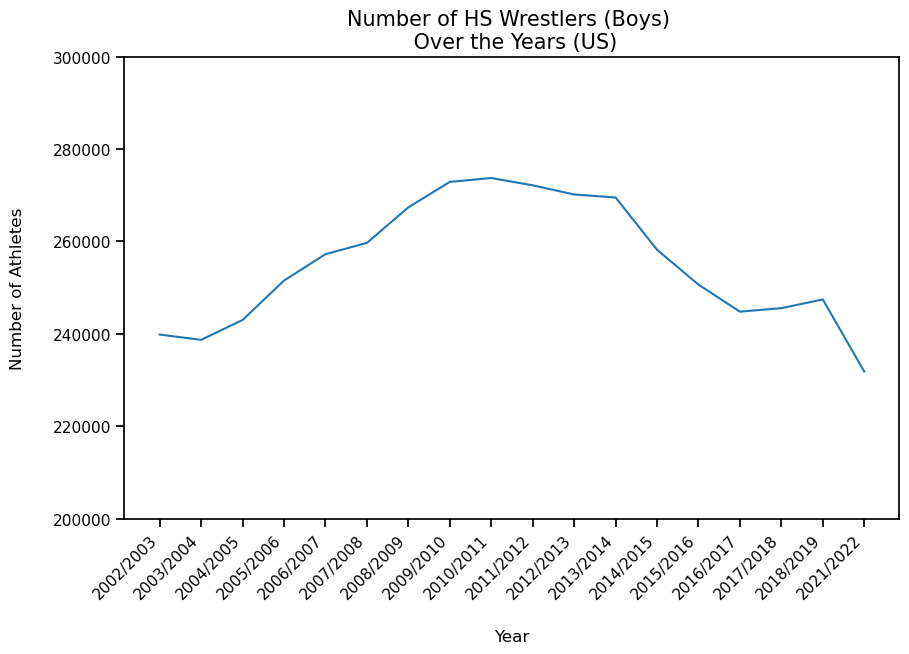

In [1144]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=wrestling_grouped_year, 
    x='Year', y='Boys Participation')
plt.xticks(rotation=45, ha='right')
plt.title('Number of HS Wrestlers (Boys) \n Over the Years (US)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Athletes', labelpad=20)
plt.ylim(200000, 300000)

(9000.0, 11000.0)

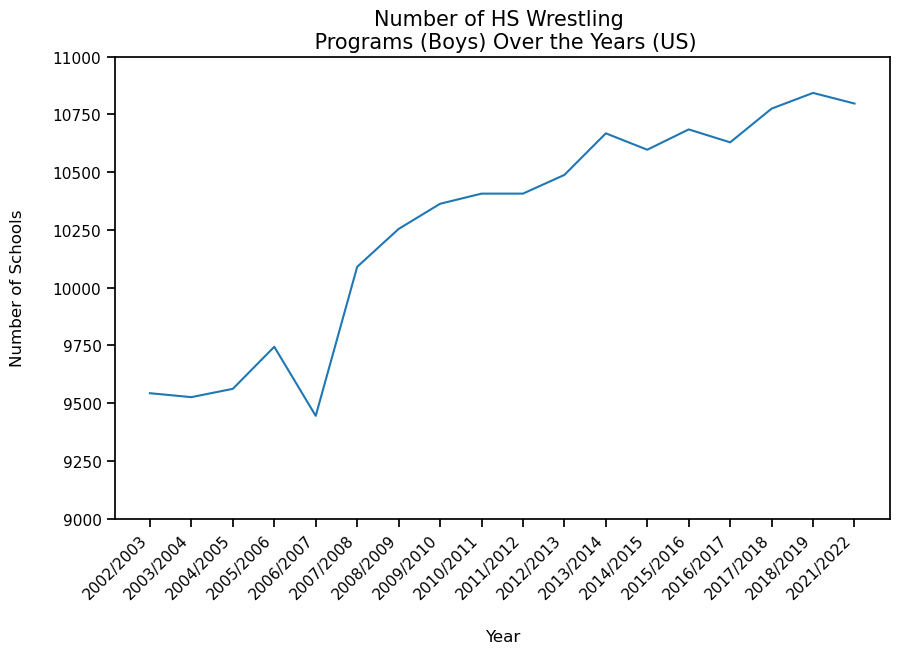

In [1145]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=wrestling_grouped_year, 
    x='Year', y='Boys School')
plt.xticks(rotation=45, ha='right')
plt.title('Number of HS Wrestling \n Programs (Boys) Over the Years (US)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Schools', labelpad=20)
plt.ylim(9000, 11000)

Text(0, 0.5, 'Number of Athletes')

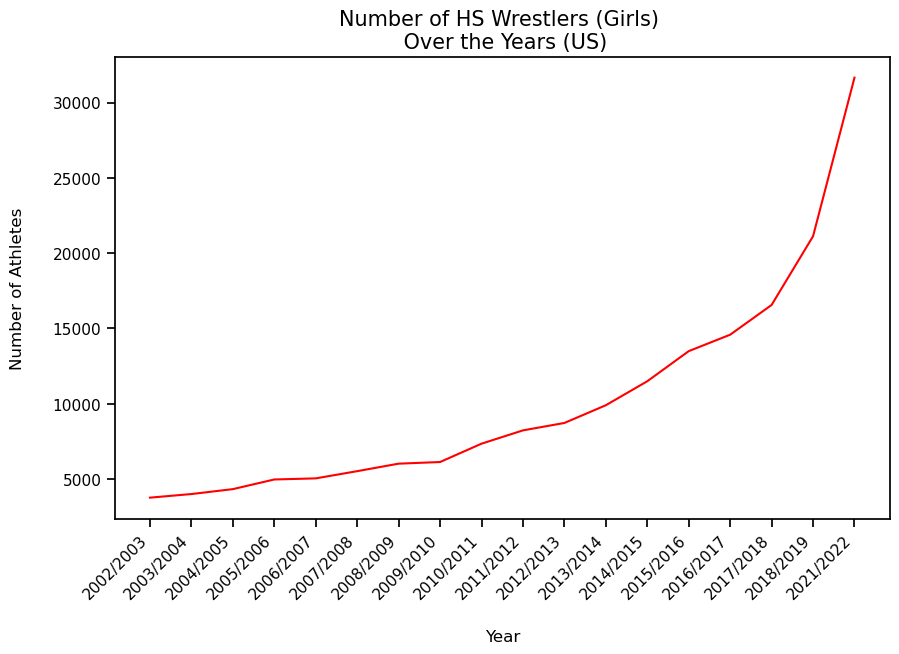

In [1146]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=wrestling_grouped_year, 
    x='Year', y='Girls Participation',color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Number of HS Wrestlers (Girls) \n Over the Years (US)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Athletes', labelpad=20)

Text(0, 0.5, 'Number of Schools')

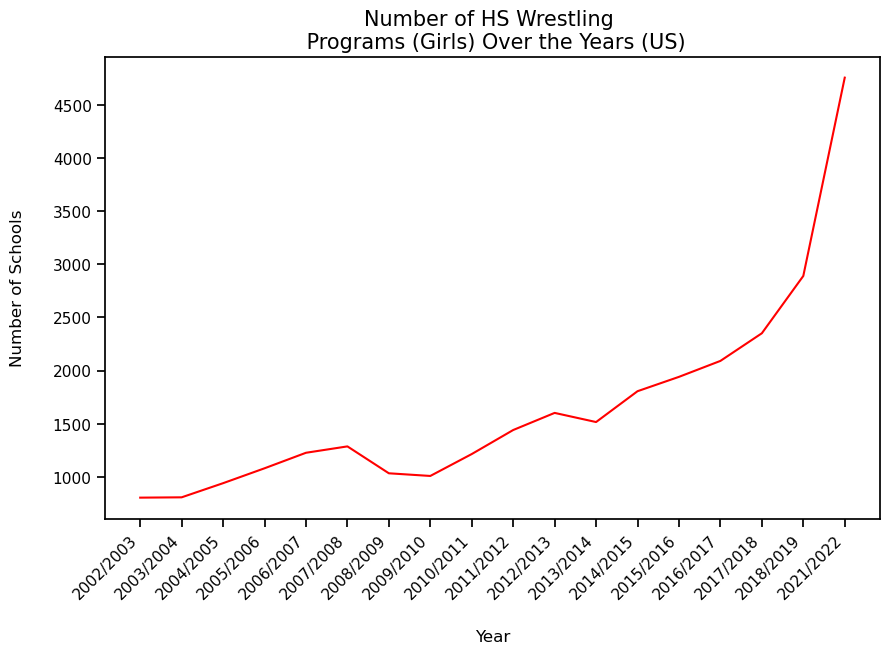

In [1147]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=wrestling_grouped_year, 
    x='Year', y='Girls School',color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Number of HS Wrestling \n Programs (Girls) Over the Years (US)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Schools', labelpad=20)

Text(0, 0.5, 'Number of Wrestlers (Normalized)')

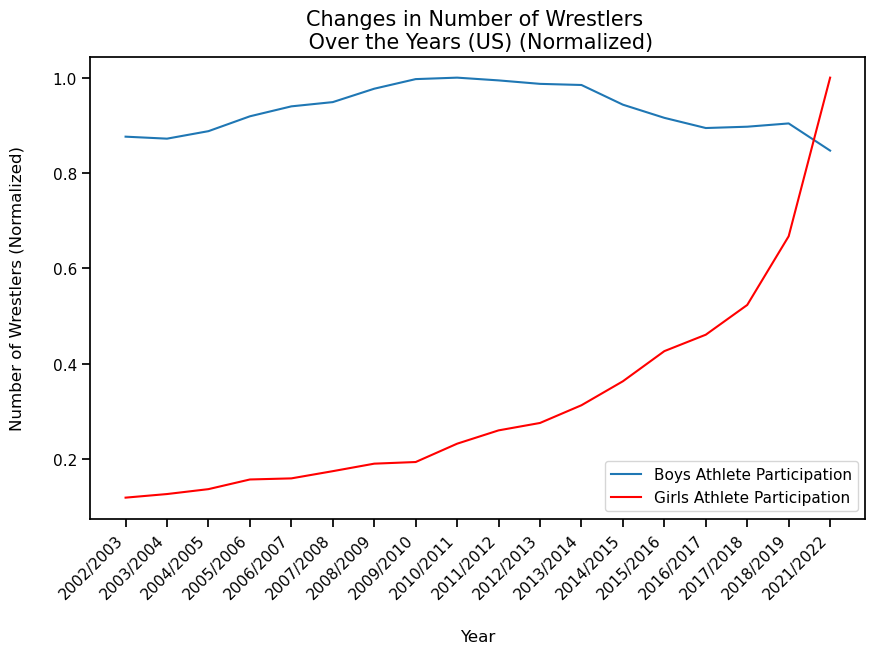

In [1148]:
wrestling_grouped_year['BoysNormalized'] = wrestling_grouped_year['Boys Participation'] / wrestling_grouped_year['Boys Participation'].max()
wrestling_grouped_year['GirlsNormalized'] = wrestling_grouped_year['Girls Participation'] / wrestling_grouped_year['Girls Participation'].max()
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='BoysNormalized', data=wrestling_grouped_year, label='Boys Athlete Participation')
sns.lineplot(x='Year', y='GirlsNormalized', data=wrestling_grouped_year, label='Girls Athlete Participation',color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Changes in Number of Wrestlers \n Over the Years (US) (Normalized)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Wrestlers (Normalized)', labelpad=20)

Text(0, 0.5, 'Number of Schools (Normalized)')

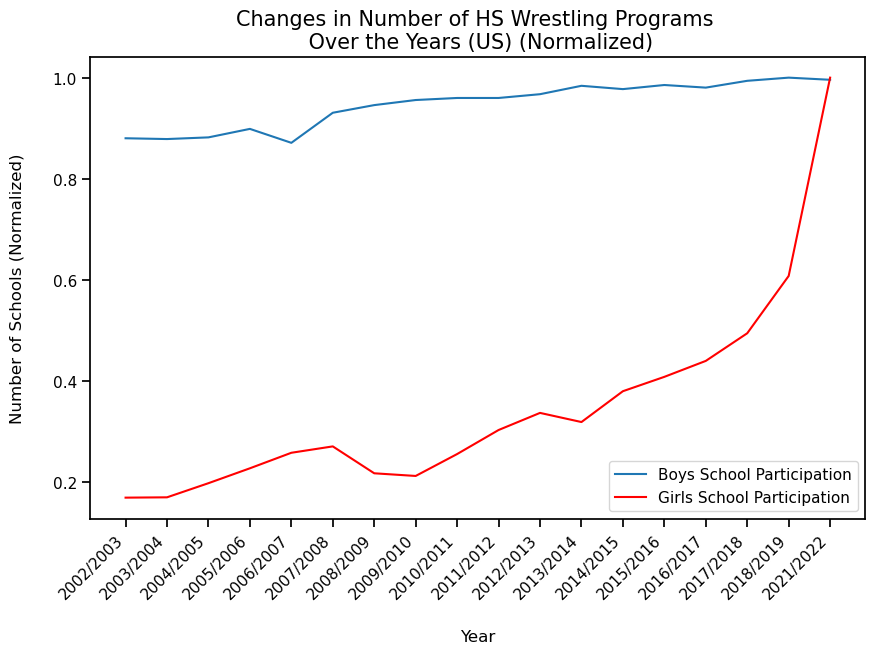

In [1149]:
wrestling_grouped_year['BoysSchoolsNormalized'] = wrestling_grouped_year['Boys School'] / wrestling_grouped_year['Boys School'].max()
wrestling_grouped_year['GirlsSchoolsNormalized'] = wrestling_grouped_year['Girls School'] / wrestling_grouped_year['Girls School'].max()
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='BoysSchoolsNormalized', data=wrestling_grouped_year, label='Boys School Participation')
sns.lineplot(x='Year', y='GirlsSchoolsNormalized', data=wrestling_grouped_year, label='Girls School Participation',color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Changes in Number of HS Wrestling Programs \n Over the Years (US) (Normalized)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Schools (Normalized)', labelpad=20)

In [1150]:
df_grouped_sport = df.groupby('Sport').sum(numeric_only=True)

In [1151]:
wrestling_grouped_state = wrestling.groupby('State').sum(numeric_only=True)

In [1152]:
# Sort the DataFrame by the 'Boys School' column
wrestling2122_sorted = wrestling2122.sort_values('Boys School', ascending=False)

# Create a new DataFrame with the top 10 rows
top_10_boys_school_2122 = wrestling2122_sorted.head(10)

## Exploring the States with Most HS Wrestlers and Wrestling Programs

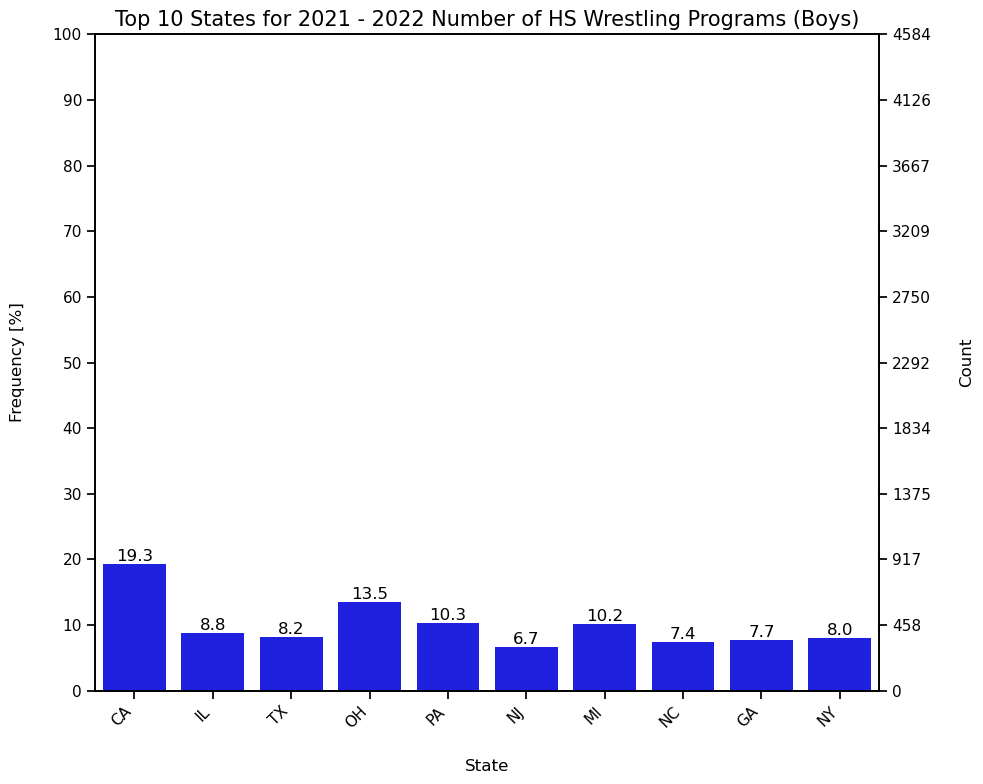

In [1153]:
ncount = top_10_boys_2122['Boys School'].sum()
sns.set_context('notebook',font_scale=1)
plt.figure(figsize=(10,8))
BoysParticipation = sns.barplot(x='State', y='Boys School', data=top_10_boys_2122,color='blue')
plt.title('Top 10 States for 2021 - 2022 Number of HS Wrestling Programs (Boys)',fontsize=15)
plt.xlabel('State',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
BoysParticipation2=BoysParticipation.twinx()

# Switch so count axis is on right, frequency on left
BoysParticipation2.yaxis.tick_left()
BoysParticipation.yaxis.tick_right()

# Also switch the labels over
BoysParticipation.yaxis.set_label_position('right')
BoysParticipation.set_ylabel('Count',labelpad=20)
BoysParticipation2.yaxis.set_label_position('left')
BoysParticipation2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
BoysParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in BoysParticipation.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    BoysParticipation.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
BoysParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

BoysParticipation2.set_ylim(0,100)
BoysParticipation.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
BoysParticipation2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

In [1154]:
# Sort the DataFrame by the 'Boys Participation' column
wrestling2122_sorted = wrestling2122.sort_values('Boys Participation', ascending=False)

# Create a new DataFrame with the top 10 rows
top_10_boys_2122 = wrestling2122_sorted.head(10)

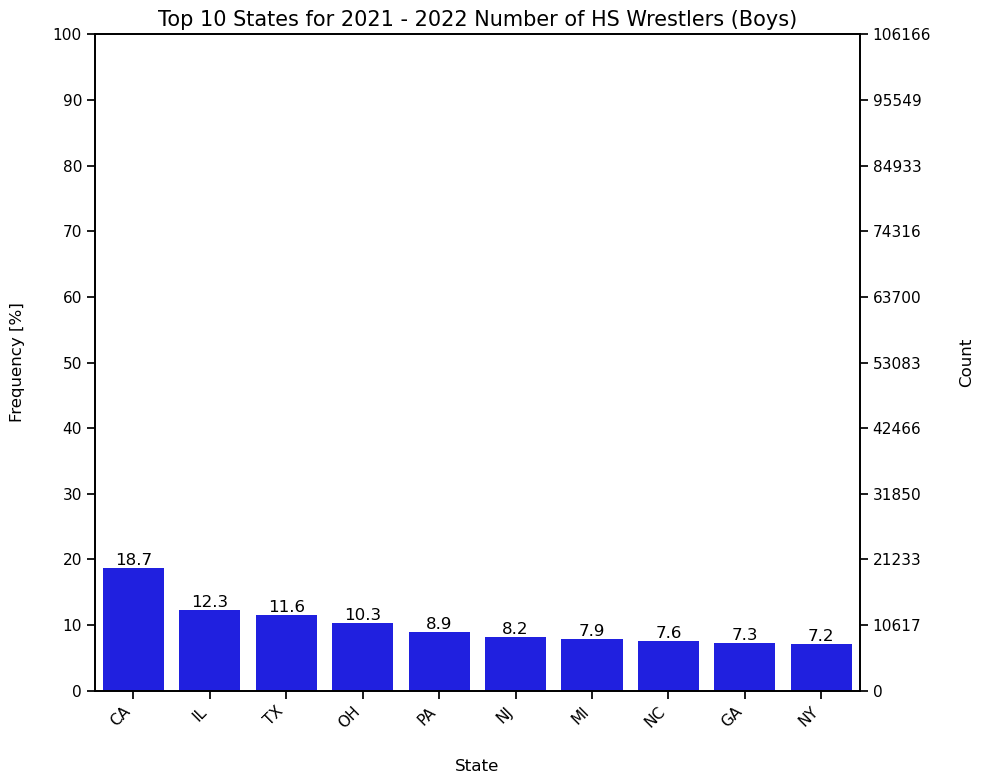

In [1155]:
ncount = top_10_boys_2122['Boys Participation'].sum()
sns.set_context('notebook',font_scale=1)
plt.figure(figsize=(10,8))
BoysParticipation = sns.barplot(x='State', y='Boys Participation', data=top_10_boys_2122,color='blue')
plt.title('Top 10 States for 2021 - 2022 Number of HS Wrestlers (Boys)',fontsize=15)
plt.xlabel('State',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
BoysParticipation2=BoysParticipation.twinx()

# Switch so count axis is on right, frequency on left
BoysParticipation2.yaxis.tick_left()
BoysParticipation.yaxis.tick_right()

# Also switch the labels over
BoysParticipation.yaxis.set_label_position('right')
BoysParticipation.set_ylabel('Count',labelpad=20)
BoysParticipation2.yaxis.set_label_position('left')
BoysParticipation2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
BoysParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in BoysParticipation.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    BoysParticipation.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
BoysParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

BoysParticipation2.set_ylim(0,100)
BoysParticipation.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
BoysParticipation2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

In [1156]:
# Sort the DataFrame by the 'Girls Participation' column
wrestling2122_sorted = wrestling2122.sort_values('Girls School', ascending=False)

# Create a new DataFrame with the top 10 rows
top_10_Girls_2122 = wrestling2122_sorted.head(10)

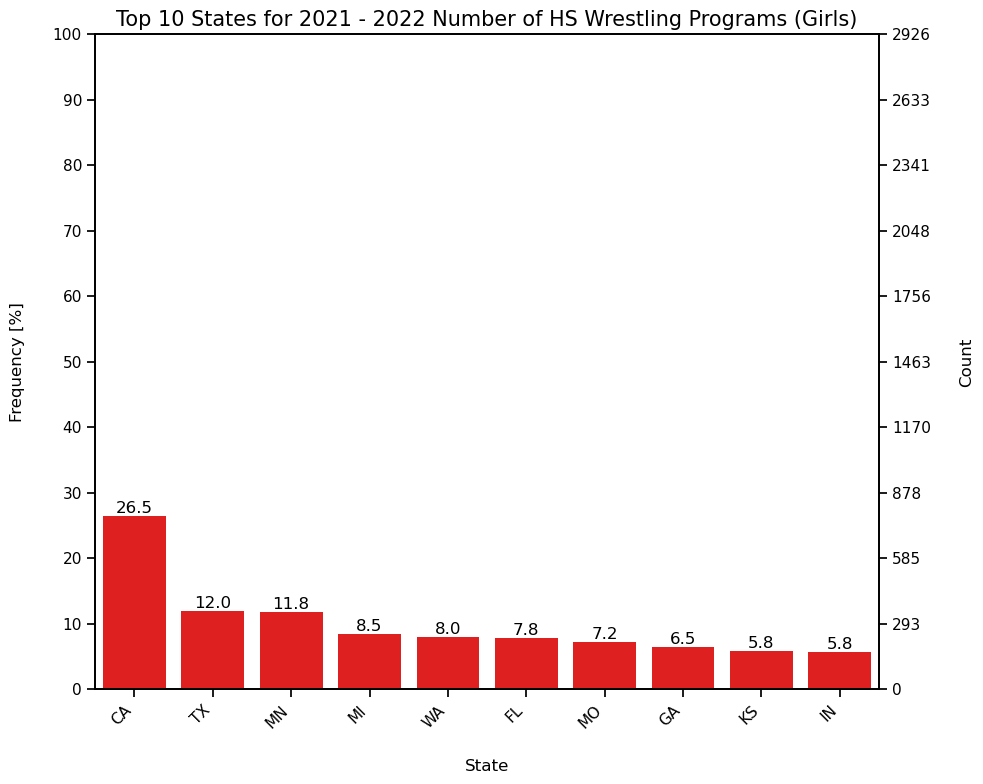

In [1157]:
ncount = top_10_Girls_2122['Girls School'].sum()
sns.set_context('notebook',font_scale=1)
plt.figure(figsize=(10,8))
GirlsParticipation = sns.barplot(x='State', y='Girls School', data=top_10_Girls_2122,color='red')
plt.title('Top 10 States for 2021 - 2022 Number of HS Wrestling Programs (Girls)',fontsize=15)
plt.xlabel('State',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
GirlsParticipation2=GirlsParticipation.twinx()

# Switch so count axis is on right, frequency on left
GirlsParticipation2.yaxis.tick_left()
GirlsParticipation.yaxis.tick_right()

# Also switch the labels over
GirlsParticipation.yaxis.set_label_position('right')
GirlsParticipation.set_ylabel('Count',labelpad=20)
GirlsParticipation2.yaxis.set_label_position('left')
GirlsParticipation2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
GirlsParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in GirlsParticipation.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    GirlsParticipation.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
GirlsParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

GirlsParticipation2.set_ylim(0,100)
GirlsParticipation.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
GirlsParticipation2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

In [1158]:
# Sort the DataFrame by the 'Girls Participation' column
wrestling2122_sorted = wrestling2122.sort_values('Girls Participation', ascending=False)

# Create a new DataFrame with the top 10 rows
top_10_Girls_2122 = wrestling2122_sorted.head(10)

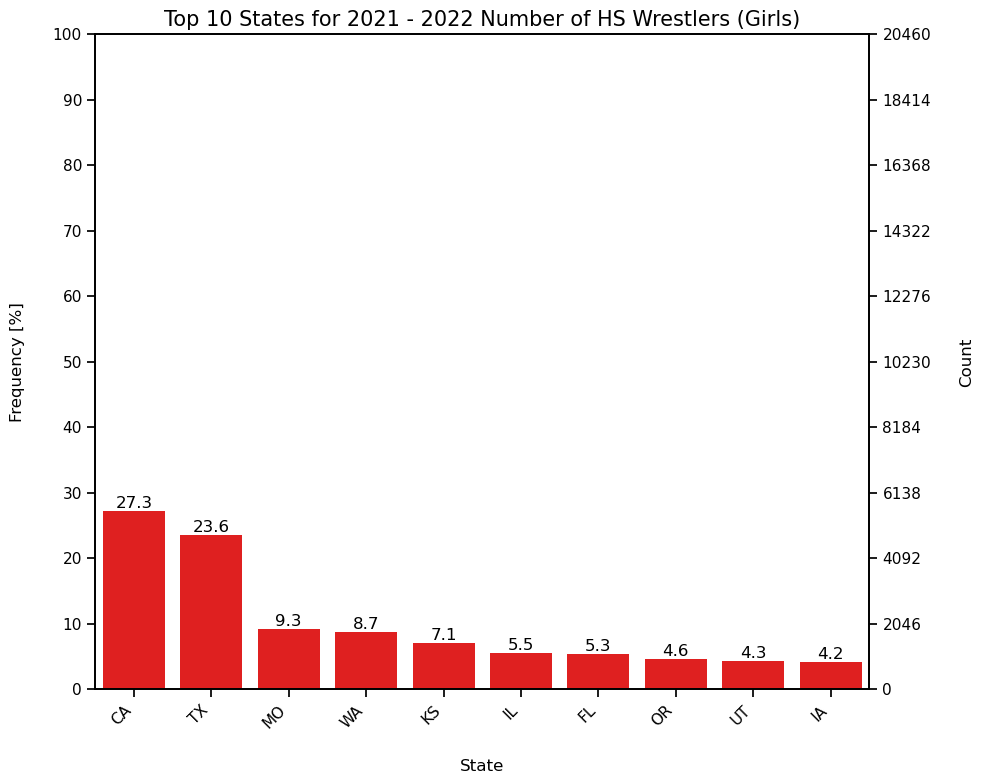

In [1159]:
ncount = top_10_Girls_2122['Girls Participation'].sum()
sns.set_context('notebook',font_scale=1)
plt.figure(figsize=(10,8))
GirlsParticipation = sns.barplot(x='State', y='Girls Participation', data=top_10_Girls_2122, color='red')
plt.title('Top 10 States for 2021 - 2022 Number of HS Wrestlers (Girls)',fontsize=15)
plt.xlabel('State',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
GirlsParticipation2=GirlsParticipation.twinx()

# Switch so count axis is on right, frequency on left
GirlsParticipation2.yaxis.tick_left()
GirlsParticipation.yaxis.tick_right()

# Also switch the labels over
GirlsParticipation.yaxis.set_label_position('right')
GirlsParticipation.set_ylabel('Count',labelpad=20)
GirlsParticipation2.yaxis.set_label_position('left')
GirlsParticipation2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
GirlsParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in GirlsParticipation.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    GirlsParticipation.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
GirlsParticipation.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

GirlsParticipation2.set_ylim(0,100)
GirlsParticipation.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
GirlsParticipation2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

## Visualizing Growth Wrestling Compared to Other Sports
- Please note that there is no available data for 'Other Sports' for the 2021/2022 school year

In [1160]:
other_sports_grouped_year['BoysNormalized'] = other_sports_grouped_year['Boys Participation'] / other_sports_grouped_year['Boys Participation'].max()
other_sports_grouped_year['GirlsNormalized'] = other_sports_grouped_year['Girls Participation'] / other_sports_grouped_year['Girls Participation'].max()

In [1161]:
other_sports_grouped_year['BoysSchoolsNormalized'] = other_sports_grouped_year['Boys School'] / other_sports_grouped_year['Boys School'].max()
other_sports_grouped_year['GirlsSchoolsNormalized'] = other_sports_grouped_year['Girls School'] / other_sports_grouped_year['Girls School'].max()

Text(0, 0.5, 'Number of Athletes (Normalized)')

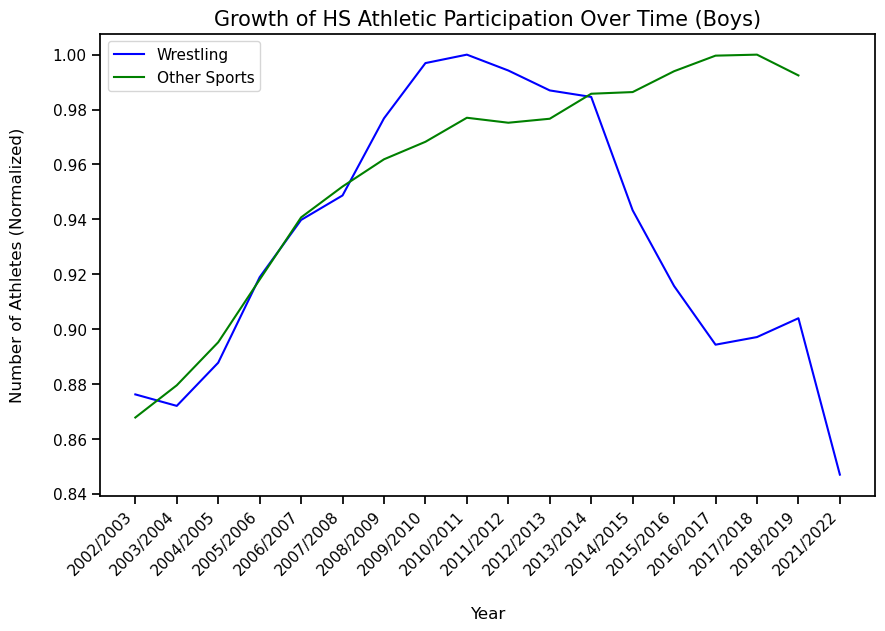

In [1162]:
# lineplot of boys wrestling athlete participation compared to all other boys sports participations (normalized)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='BoysNormalized', data=wrestling_grouped_year, label='Wrestling',color='blue')
sns.lineplot(x='Year', y='BoysNormalized', data=other_sports_grouped_year, label='Other Sports',color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Growth of HS Athletic Participation Over Time (Boys)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Athletes (Normalized)', labelpad=20)

Text(0, 0.5, 'Number of Athletes (Normalized)')

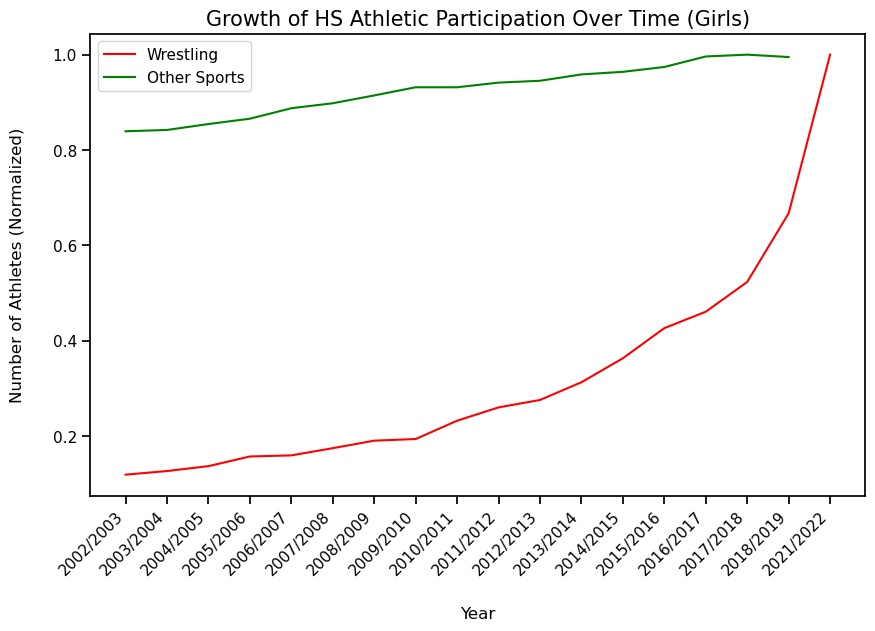

In [1163]:
# lineplot of girls wrestling athlete participation compared to all other boys sports participations (normalized)
plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='GirlsNormalized', data=wrestling_grouped_year, label='Wrestling',color='red')
sns.lineplot(x='Year', y='GirlsNormalized', data=other_sports_grouped_year, label='Other Sports',color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Growth of HS Athletic Participation Over Time (Girls)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Athletes (Normalized)', labelpad=20)

Text(0, 0.5, 'Number of Athletic Programs (Normalized)')

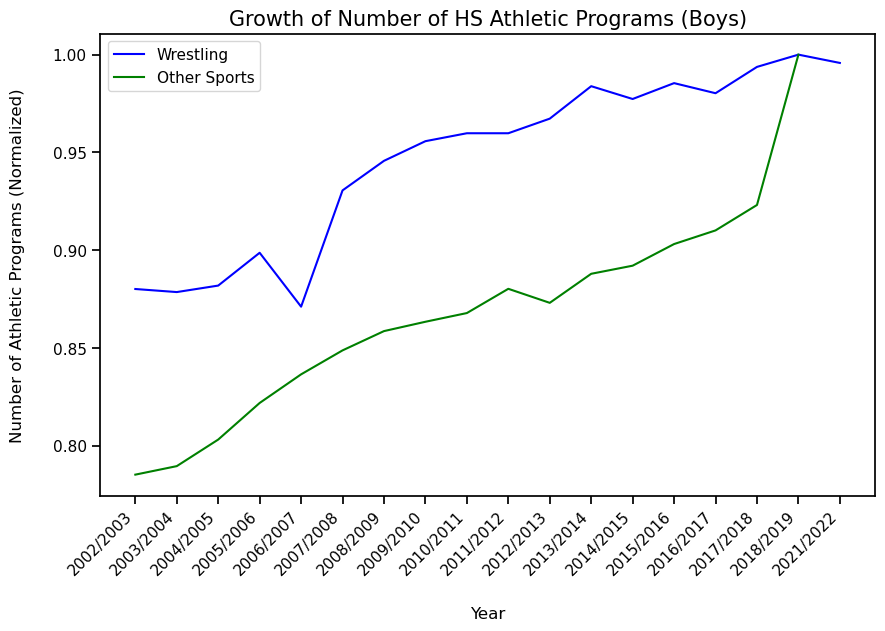

In [1164]:
# lineplot of boys wrestling school participation compared to all other boys sports participations (normalized)
plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='BoysSchoolsNormalized', data=wrestling_grouped_year, label='Wrestling',color='blue')
sns.lineplot(x='Year', y='BoysSchoolsNormalized', data=other_sports_grouped_year, label='Other Sports',color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Growth of Number of HS Athletic Programs (Boys)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Athletic Programs (Normalized)', labelpad=20)

Text(0, 0.5, 'Number of Athletic Programs (Normalized)')

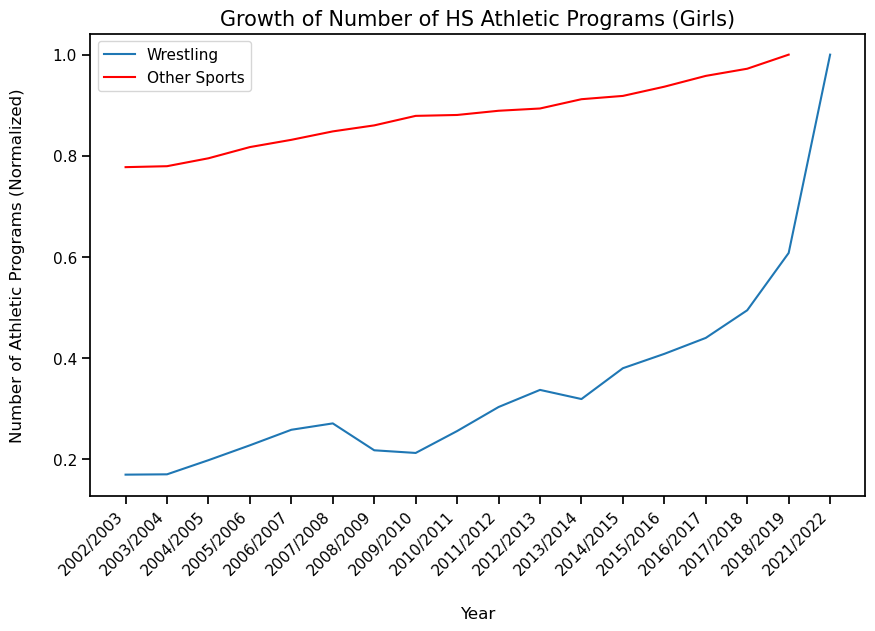

In [1165]:
# lineplot of girls wrestling participation compared to all other girls sports participations (normalized)
plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='GirlsSchoolsNormalized', data=wrestling_grouped_year, label='Wrestling')
sns.lineplot(x='Year', y='GirlsSchoolsNormalized', data=other_sports_grouped_year, label='Other Sports',color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Growth of Number of HS Athletic Programs (Girls)',fontsize=15)
plt.xlabel('Year',labelpad=20)
plt.ylabel('Number of Athletic Programs (Normalized)', labelpad=20)

## Visualizing A Heatmap of HS Wrestling Participation

In [1166]:
wrestling2122['BoysNormalized'] = wrestling2122['Boys Participation'] / wrestling2122['Boys Participation'].max()
wrestling2122['GirlsNormalized'] = wrestling2122['Girls Participation'] / wrestling2122['Girls Participation'].max()

In [1167]:
other_sports_grouped_state = OtherSports.groupby(['State']).sum(numeric_only=True)

In [1168]:
wrestling_grouped_state['Percentage of Wrestlers (Boys)'] = wrestling_grouped_state['Boys Participation'] / other_sports_grouped_state['Boys Participation'].max()

In [1169]:
wrestling_grouped_state['Percentage of Wrestlers (Girls)'] = wrestling_grouped_state['Girls Participation'] / other_sports_grouped_state['Girls Participation'].max()

In [1170]:
wrestling_grouped_state = wrestling_grouped_state.reset_index()

In [1171]:
import plotly.express as px

fig = px.choropleth(wrestling_grouped_state,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage of Wrestlers (Boys)',
                    color_continuous_scale="blues")
fig.update_layout(
      title_text = 'Percentage of HS Athletes (Boys) that Participant in Wrestling (2002 - 2022)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,
    
         )

In [1172]:
import plotly.express as px
fig = px.choropleth(wrestling_grouped_state,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage of Wrestlers (Girls)',
                    color_continuous_scale="reds")
fig.update_layout(
      title_text = 'Percentage of HS Athletes (Girls) that Participant in Wrestling (2002 - 2022)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

In [1173]:
wrestling.sort_values(by='Year', inplace=True)

In [1174]:
fig1 = px.choropleth(wrestling,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Boys Participation',
                    color_continuous_scale="blues", 
                    scope="usa",
                    animation_frame='Year') #make sure 'period_begin' is string type and sorted in ascending order
fig1.update_layout(
      title_text = 'Number of HS Wrestlers Over the Years (Boys)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

In [1175]:
fig1 = px.choropleth(wrestling,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Girls Participation',
                    color_continuous_scale="reds", 
                    scope="usa",
                    animation_frame='Year') #make sure 'period_begin' is string type and sorted in ascending order
fig1.update_layout(
      title_text = 'Number of HS Wrestlers Over the Years (Girls)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )